# 📊 Project: Analysis and Summary of Artists' Age Intervals and Frequency of Artwork creation

## Table of Contents (TOC)
1. [Project](#')
    * [Introduction](#Introduction)
    * [Data Description](#Descriptions-of-the-columns)
2. [Importing Modules](#Importing-Modules)
2. [Data Exploration](#Opening-and-Exploring-the-data)
    * [Data Quality Report](#Data-Quality-Report)
    * [Data Cleaning](#Data-Cleaning)
        * [Replace The Parentheses](#Replace-the-parenthese)
        * [Uniform The Data Entries](#Uniform-the-data-entries)
            * [Remove Bad Characters](#Remove-bad-characters-in-a-list)
            * [Remove duplicated values](#Detect-and-Remove-duplicated-entries)
3. [Average Frequency of Artwork Creation by an Artist](#Average-Frequency-of-Artwork-Creation-by-an-Artist)
4. [Analyzing and summarizing artists' age interval](#Analyzing-and-summarizing-artists'-age-interval)
5. [Conclusion](#Conclusion)

## Introduction
- We are going to work with the data about art in the ***Museum of Modern Art (MoMA)*** in New York City, which has one of the largest collections of modern art in the World

## Descriptions of the columns
- Title: the title of the artwork
- Artist: the name of the artist who created the artwork
- Nationality: the nationality of the artist
- BeginDate: the year in which the artist was born
- EndDate: the year in which the artist died
- Gender: the gender of the artist
- Date: the date that the artwork was created
- Department: the department inside MoMA to which the artwork belongs

# Importing Modules

In [1]:
# Pandas
import pandas as pd
# Defaultdict
from collections import defaultdict
# Numpy
import numpy as np
# Matplotlib
from matplotlib import pyplot as plt

# Opening and Exploring the data

https://www.kaggle.com/datasets/momanyc/museum-collection

In [2]:
def extract_file(file_csv):
    from csv import reader
    with open(file_csv,encoding='utf-8') as opened_file:
        read_file = reader(opened_file)
        dataset = list(read_file)
    return dataset

In [3]:
#Opening MoMA dataset
moma = extract_file('C:/Users/admin/Documents/DATA ANALYST/Project/2025/Python In DA/I_Introduction To Python/MomaProject/artworks.csv')
header_moma = moma[0]
moma = moma[1:]

In [4]:
def explore_data(dataset,start,end,rows_and_columns =False):
    data_slice = dataset[start:end]
    for space in data_slice:
        print(space)
        print("\n")
    if rows_and_columns == True:
        print("Number of columns:",len(dataset[0]))
        print("Number of rows:",len(dataset))

In [5]:
print(header_moma)
print("\n")
explore_data(moma,0,2,True)

['Title', 'Artist', 'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date', 'Department']


['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', '(American)', '(1947)', '(2013)', '(Female)', '1986', 'Prints & Illustrated Books']


['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', '(Spanish)', '(1916)', '(2007)', '(Male)', '1978', 'Prints & Illustrated Books']


Number of columns: 8
Number of rows: 16725


## Data Quality Report

Before proceeding cleaning data, i need to know the quality of data which i am working with. Therefore, i am going make a quality report to check null values, duplicate values and unique values based on ***Title column***.

In [6]:
import pandas as pd
MOMA = pd.read_csv('C:/Users/admin/Documents/DATA ANALYST/Project/2025/Python In DA/I_Introduction To Python/MomaProject/artworks.csv')

In [7]:
def check_data_quality(df,column):
    quality_report = {
        'null_values': df.isnull().sum().to_dict(),
        'unique_values': len(df[column].unique()),
        'duplicate_values': df[column].duplicated().sum(),
        'total_rows': len(df)
    }
    return quality_report

In [8]:
quality_report = check_data_quality(df=MOMA,column='Title')
display(quality_report)

{'null_values': {'Title': 1,
  'Artist': 0,
  'Nationality': 0,
  'BeginDate': 939,
  'EndDate': 6251,
  'Gender': 0,
  'Date': 0,
  'Department': 0},
 'unique_values': 13684,
 'duplicate_values': 3041,
 'total_rows': 16725}

Generally, there are `3041 duplicated values` based on a criterion (artworks)

## Data Cleaning

### Replace the parenthese

I browse the table and see that ***Nationality, Begin Date, End Date and Gender*** columns have parentheses "()" at the beginning and the end of the values. So i am going to remove those parenthese by using replace()function

the syntax of replace: string.replact(old,new,count). Because there are two pairs of marks, so i have to use double "replace" to remove them.

In [9]:
def remove_parentheses(dataset,index):
    for row in dataset:
        column = row[index]
        column = column.replace("(",")").replace(")","")
        row[index] = column

In [10]:
#Execute it once
remove_parentheses(moma,2)  # Nationality
remove_parentheses(moma,3)  # BeginDate 
remove_parentheses(moma,4)  # EndDate
remove_parentheses(moma,5)  # Gender

I am going to check again the dataset whether the parenthese in "Nationality","Begin Date","End Date" and "Gender" columns have been deleted!

In [11]:
explore_data(moma,0,2,True)

['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', 'American', '1947', '2013', 'Female', '1986', 'Prints & Illustrated Books']


['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', 'Spanish', '1916', '2007', 'Male', '1978', 'Prints & Illustrated Books']


Number of columns: 8
Number of rows: 16725


So you can see right now, after using the loop , the parentheses are gone from the values.

### Uniform the data entries

I have just explored the ***Gender*** and ***Nationality*** columns and noticed the data entries are inconsistent, due to different capitalizations. Therefore i am going to create a function to check unique values in each column in order to uniform the data

#### Checking unique values

In [12]:
def checking_unique_values(dataset,index):
    column_list = []
    res_list = []
    for row in dataset:
        column = row[index]
        column_list.append(column)
    for item in column_list:
        if item not in res_list:
            res_list.append(item)
    return res_list

In [13]:
genre = checking_unique_values(moma,5)
print(genre)

['Female', 'Male', '', 'male']


***Genre*** column contains four unique values:"" (an empty string), "Male", "Female", "male"

In [14]:
nationality = checking_unique_values(moma,2)
print(nationality)

['American', 'Spanish', 'French', 'South African', 'Canadian', 'Czech', 'Belgian', 'Russian', 'British', 'German', '', 'Swiss', 'Polish', 'Japanese', 'Portuguese', 'Austrian', 'Australian', 'Italian', 'Chilean', 'Colombian', 'Mexican', 'Brazilian', 'Dutch', 'Romanian', 'Venezuelan', 'Korean', 'Israeli', 'Argentine', 'Indian', 'Nationality unknown', 'Swedish', 'Yugoslav', 'Cuban', 'Nationality Unknown', 'Various', 'Luxembourgish', 'Croatian', 'Bulgarian', 'Hungarian', 'Georgian', 'Puerto Rican', 'Danish', 'Serbian', 'Pakistani', 'Ecuadorian', 'Chinese', 'Iranian', 'Finnish', 'Lebanese', 'Thai', 'Cambodian', 'Scottish', 'Kenyan', 'Latvian', 'Sudanese', 'Uruguayan', 'Peruvian', 'New Zealander', 'Moroccan', 'Guatemalan', 'Cameroonian', 'Egyptian', 'Nigerian', 'Icelandic', 'Haitian', 'Tajik', 'Irish', 'Norwegian', 'Costa Rican', 'Slovenian', 'Turkish', 'Mozambican', 'Palestinian', 'Ukrainian', 'Angolan', 'Tunisian', 'Greek', 'Zimbabwean', 'Bahamian', 'Vietnamese', 'Panamanian', 'Canadian In

***Nationality*** column contains: countries and null values

#### String Capitalization

I am going to transform the first letter of each word transformed to uppercase by using `title()function` and replace `null values` with "Unknown/Other"

In [15]:
def string_capitalization(dataset,index):
    for row in dataset:
        column = row[index]
        if not column.strip(): #if there is no column and delete empty space.
            column = "Unknown/Other"
        else:
            column = column.title()
        row[index] = column

In [16]:
genre= string_capitalization(moma,5)
nationality = string_capitalization(moma,2)

Right now, the data is consistent with the capitalization of both Nationality and Gender colums uniform

I want to calculate the age at which artist produced the work with 2 columns: ***Begin Date*** and ***ArtDate*** (the date that the artwork was created). There is a problem, after i checked the unique value in the column. It contains data in many different formats:
-  Some years in parenthese
-  Some years have (c. / C.) , indicating that the year is approximate. -> use the year without c./C
-  Some have year ranges, indicated with dash.
-  Some have 's to indicate a decade. -> use the year without 's

#### Remove bad characters in a list

1. First, i am going to determine all characters in the column except numbers.
    - I use the checking_unique_value function to extract all the unique in the column year, and the result gives me a string(year) of each row. 
    - After that, i use the isdigit()method to determine if the year contains any characters except digits. If it have => Append that character to `bad_char`.
    - After executing the bad_char list, it didn't show the unique bad char, therefore i have to list(set(str))
2. I am going to build a function [to extract all characters except numbers]



In [19]:
bad_chars = []
dis_badchar = []
for year in checking_unique_values(moma,6):
    for char in year:
        # !='-' to keep the format year range
        # isdigit() returns True if all the characters are digits, otherwise False
        if not char.isdigit() and char !="-":
            bad_chars.append(char)
# Remove the duplicate
dis_badchar = list(set(bad_chars)) # Dùng set để loại bỏ duplicate hiệu quả hơn #['(', ')', '(', ')', '(', ')', 'c', '.',
print(dis_badchar)

['(', ')', '.', "'", ' ', 's', 'c']


Let's get to work to clean these bad characters. I will use a loop to iterate over each string, i'll use strip_character() function to remove the bad characters

In [20]:
def strip_characters(string):
    for char in dis_badchar:
        string = string.replace(char,"") #Loại bỏ tất cả badchars trong string, thay thế những char = ""
    return string
for row in moma:
    artdate = row[6]
    artdate = strip_characters(artdate)
    row[6] = artdate

There are two things we have to do before calculating the age at which artist produced the work.
1. Convertings from String to Int
2. There are [a single year] and [ranges of years]
- With ranges of years: i'm going to find the average between two years, after that round the number
`Format: AVG = ROUND((YEAR + YEAR)/2)`

In [21]:
def process_date(string):
    if "-" in string:
        split_str = string.split("-")   #[[1,2],[2,3]]
        split_str_one = split_str[0]
        split_str_two = split_str[1]
        string = round((int(split_str_one) + int(split_str_two))/2)
    return string
for row in moma:
    artdate = row[6]
    artdate = process_date(artdate)
    row[6] = artdate

In [22]:
explore_data(moma,0,2,True)

['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', 'American', '1947', '2013', 'Female', '1986', 'Prints & Illustrated Books']


['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', 'Spanish', '1916', '2007', 'Male', '1978', 'Prints & Illustrated Books']


Number of columns: 8
Number of rows: 16725


Basically, the data entries has been cleaned and consistent. There is one thing we have to do is that creating a function to check duplicate and unique values.

### Detect and Remove duplicated entries

Explaination:
1. Step one:
- duplicate_app: A list stores duplicated values based on 4 criterions in "entry_key"
- unique_app: A list stores unique values based on 4 criterions in "entry_key"
- Use set() to check entries in entry_key faster, because we have 4 columns to check
2. Step two:
- Extract data by index
3. Step three:
- Create a tuple to  all the data at the same time #check lai
4. Step four:
- Execute the code: if in unique_entry => mark as a duplicate value
- Processing:
Entry_one: add to unique_entry and unique_app
Entry_two: detect if the data having in unique_entry-> then add to duplicate_app.

**Việc sử dụng set thì sẽ chạy code nhanh hơn, không sử dụng set cũng được, nhưng mà đợi sẽ lâu hơn 1 chút

In [26]:
#STEP ONE:
duplicate_app = []
unique_app = [] 
unique_entry = set() 

#STEP TWO:
for app in moma:
    title = app[0]
    artist = app[1]
    nationality = app[2]
    department = app[-1]

#STEP THREE
    entry_key = (title,artist,nationality,department) #Criterions

#STEP FOUR
    if entry_key in unique_app:
        duplicate_app.append(app)
    else:
        #unique_entry.add(entry_key)
        unique_app.append(app)
        
#STEP FIVE: Result
print(f"The number of duplicate apps: {len(duplicate_app)} apps in MOMA dataset")
print(f"The number of unique apps: {len(unique_app)} apps in MOMA dataset")

The number of duplicate apps: 0 apps in MOMA dataset
The number of unique apps: 16725 apps in MOMA dataset


In [24]:
Cl_moma = unique_app
explore_data(Cl_moma,0,2,True)

['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', 'American', '1947', '2013', 'Female', '1986', 'Prints & Illustrated Books']


['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', 'Spanish', '1916', '2007', 'Male', '1978', 'Prints & Illustrated Books']


Number of columns: 8
Number of rows: 14399


Now the data entries has been cleaned totally.

# Average Frequency of Artwork Creation by an Artist

(calculated using BeginDate and ArtDate)

# Analyzing and summarizing artists' age interval

(calculated using BeginDate and EndDate) to investigate their relationship with the number of artworks produced. For example: Do artists who live longer tend to create more artworks?

In [49]:
age_gender_dict = {}
for row in Cl_moma:
    BeginDate = row[3]
    EndDate = row[4]
    Gender = row[5]
    try:
        if BeginDate != "" and EndDate != "":
            birth = int(BeginDate)
            death = int(EndDate)
            if death >= birth:
                age = death - birth
                if age >= 20:
                    decade_group = f"{(age//10)*10}s"
                else:  # age < 20
                    decade_group = "Unknown"
            else:
                decade_group = "Invalid"
    except ValueError:
        decade_group = "Invalid"
    
    # Khởi tạo key nếu chưa tồn tại
    if decade_group not in age_gender_dict:
        age_gender_dict[decade_group] = {'Male': 0, 'Female': 0, 'Other': 0}
    
    # Đếm theo giới tính
    if Gender == "Male":
        age_gender_dict[decade_group]['Male'] += 1
    elif Gender == "Female":
        age_gender_dict[decade_group]['Female'] += 1
    else:
        age_gender_dict[decade_group]['Other'] += 1

Mostly, each decade group, Male has more artworks than Female

In [48]:
display(age_gender_dict)

{'60s': {'Male': 1437, 'Female': 319, 'Other': 52},
 '90s': {'Male': 1760, 'Female': 588, 'Other': 72},
 '70s': {'Male': 3578, 'Female': 447, 'Other': 113},
 '80s': {'Male': 3775, 'Female': 481, 'Other': 116},
 '50s': {'Male': 665, 'Female': 84, 'Other': 34},
 '40s': {'Male': 474, 'Female': 59, 'Other': 14},
 '30s': {'Male': 168, 'Female': 41, 'Other': 5},
 '20s': {'Male': 17, 'Female': 5, 'Other': 6},
 '100s': {'Male': 63, 'Female': 23, 'Other': 1},
 'Unknown': {'Male': 0, 'Female': 0, 'Other': 2}}

- General trend:
1. Artists who lived into their 60+ -> 80+ produced the most work, possibly due to a longer period of time spent creating
2. The group under 50 group has fewer works perharps because they died early or were not recognized.

In [50]:
sorted_decade_group = sorted(age_gender_dict.items(),key=lambda x:sum(x[1].values()),reverse=True)
for group, counts in sorted_decade_group:
    total = sum(counts.values())
    print(f"{group}: {total} records")

80s: 4372 records
70s: 4138 records
90s: 2420 records
60s: 1808 records
50s: 783 records
40s: 547 records
30s: 214 records
100s: 87 records
20s: 28 records
Unknown: 2 records


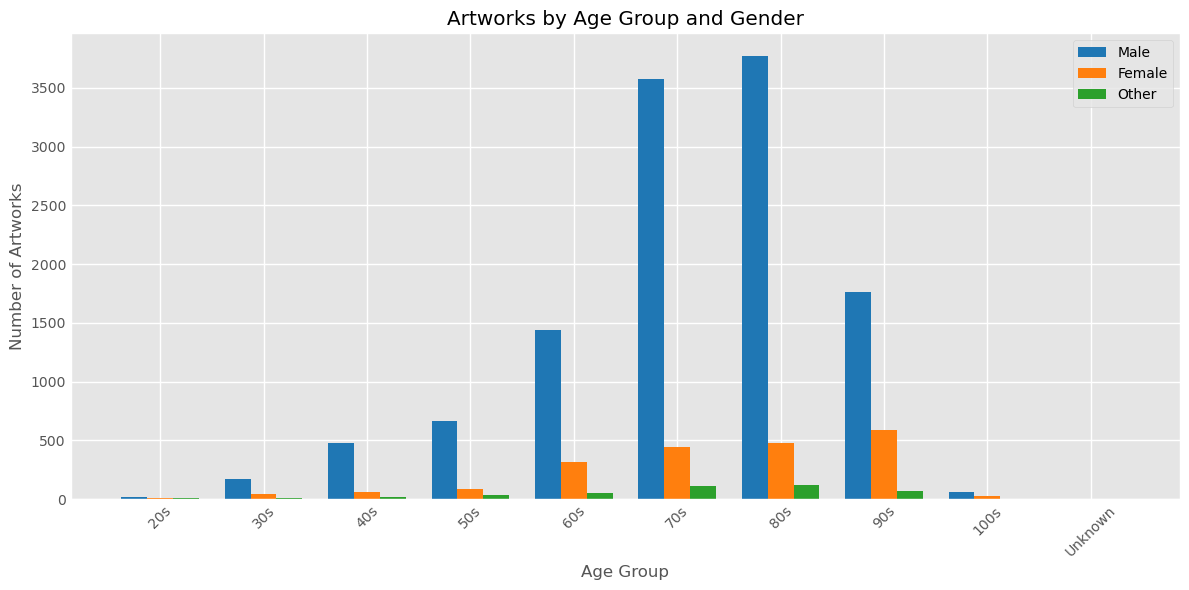

In [138]:
# Danh sách các nhóm tuổi (sắp xếp theo thứ tự)
age_list = sorted(age_gender_dict.keys(), key=lambda x: int(x[:-1]) if x != 'Unknown' else 999)

# Danh sách các giới tính (lấy từ keys của dictionary con đầu tiên)
gender_list = list(age_gender_dict['60s'].keys())  # ['Male', 'Female', 'Other']

# Ma trận giá trị (số lượng) cho từng nhóm tuổi và giới tính
values_list = np.array([[age_gender_dict[age][gender] for gender in gender_list] for age in age_list])

import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = np.arange(len(age_list))  # Vị trí các nhóm tuổi
width = 0.25  # Độ rộng mỗi cột
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Màu cho Male, Female, Other

fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ các cột cho từng giới tính
for i, gender in enumerate(gender_list):
    ax.bar(x + i*width, values_list[:, i], width, label=gender, color=colors[i])

# Title, xlabel, ylabel
plt.title('Artworks by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Artworks')

ax.set_xticks(x + width)
ax.set_xticklabels(age_list, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()